In [115]:
import os
import glob
import math

In [116]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [117]:
# Функция вывода. 
def pltshow(img,size=(5,5)):
    plt.figure(figsize=size)
    plt.axis('off')
    plt.imshow(img)
    plt.show()

INPUT


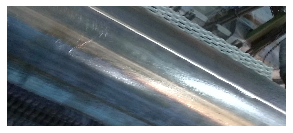

4.1.0
CPU times: user 489 ms, sys: 94.8 ms, total: 584 ms
Wall time: 645 ms


In [155]:
%%time
in_img = cv2.imread('IMG619.jpeg') 
print('INPUT')
pltshow(in_img)
print (cv2.__version__)

In [156]:
def distf(a,b):
    return math.sqrt(math.pow(a[0]-b[0],2)+math.pow(a[1]-b[1],2))

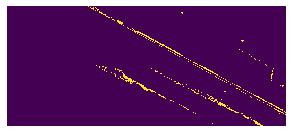

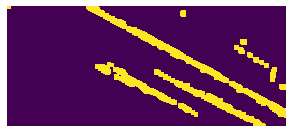

291.49442533262965


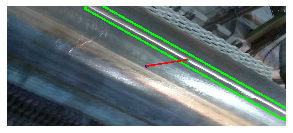

In [157]:
def find_shov(img):
     # диапазон для HSV
    #lower_white = np.array([53,6,157], dtype=np.uint8)
    #upper_white = np.array([117,255,255], dtype=np.uint8)
    #lower_white = np.array([0,0,118], dtype=np.uint8)
    #upper_white = np.array([39,19,255], dtype=np.uint8)
    lower_white = np.array([0,0,136], dtype=np.uint8)
    upper_white = np.array([25,22,228], dtype=np.uint8)
    
    # переводим из BGR в HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    # отсеиваем цвета
    mask = cv2.inRange(hsv, lower_white, upper_white)  
    pltshow(mask)
    kernel = np.ones((2,2),np.uint8)
    morph_img = cv2.morphologyEx(mask,cv2.MORPH_OPEN,kernel, iterations = 2)
    
    kernel = np.ones((4,4),np.uint8)
    dilate_img = cv2.dilate(morph_img,kernel,iterations = 10)
    pltshow(dilate_img)
    
    

    # находим контуры
    contours, _ = cv2.findContours(dilate_img,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    
    # находим максимальный контур
    cnt = max(contours, key=cv2.contourArea)
    
    return cv2.minAreaRect(np.array(cnt))
    
    
rect = find_shov(in_img)
box = cv2.boxPoints(rect)
box = np.int0(box)
out = in_img.copy()
cv2.drawContours(out,[box],0,(0,255,0),13)

(h, w) = in_img.shape[:2]
center_img = (int(w / 2), int(h / 2))
center_rect = (int(rect[0][0]),int(rect[0][1]))

edge1 = np.int0((box[1][0] - box[0][0],box[1][1] - box[0][1]))
edge2 = np.int0((box[2][0] - box[1][0], box[2][1] - box[1][1]))

# выясняем какой вектор больше
usedEdge = edge1
if cv2.norm(edge2) > cv2.norm(edge1):
    usedEdge = edge2
reference = (1,0) # горизонтальный вектор, задающий горизонт

    # вычисляем угол между самой длинной стороной прямоугольника и горизонтом
angle = 180.0/math.pi * math.acos((reference[0]*usedEdge[0] + reference[1]*usedEdge[1]) / (cv2.norm(reference) *cv2.norm(usedEdge)))
 
 
        #cv.drawContours(img,[box],0,(255,0,0),2) 
    
    # выводим в кадр величину угла наклона
#cv2.putText(out, "%d" %int(angle), (center_rect[0]+20, center_rect[1]-20), 
                   #cv2.FONT_HERSHEY_SIMPLEX, 2, (255,0,0), 4)

cv2.circle(out, center_rect, 10, (0,255,0),-1)
cv2.circle(out, center_img, 10, (0,0,255),-1)
cv2.line(out,center_rect,center_img,(255,0,0),10)

print(distf(center_img,center_rect))
pltshow(out)